# SYRIATEL CUSTOMER CHURN PREDICTION - PHASE 3 PROJECT

## 1. Project Overview

Customer retention is a key priority for telecom companies due to the high cost of acquiring new customers compared to retaining existing ones. This project focuses on predicting customer churn for **SyriaTel**, a telecommunications company. Using historical customer data, we aim to build a machine learning model that accurately identifies customers who are likely to leave the service.

By predicting churn in advance, SyriaTel can proactively engage with high-risk customers through personalized retention strategies, thereby minimizing revenue loss and improving customer satisfaction.

## 2. Business Understanding

In the highly competitive telecom industry, customer churn poses a significant threat to profitability. Companies invest heavily in marketing and infrastructure to acquire customers, and when these customers leave, the loss is twofold: reduced revenue and wasted acquisition cost.

SyriaTel is currently experiencing an increase in customer attrition. With thousands of customers and numerous behavioral and demographic factors influencing churn, manual tracking is not feasible. Thus, there is a business need for a **data-driven solution** to identify at-risk customers and retain them before they churn.

## 3. Problem Statement

SyriaTel is losing a significant number of customers every month, but lacks a reliable system to identify these customers in advance. Without this knowledge, the company cannot implement timely retention strategies, leading to revenue loss and decreased customer lifetime value.

This project aims to develop a **predictive model** that identifies customers likely to churn based on their historical behavior and demographics. The model will enable SyriaTel to:
- Prioritize retention efforts for high-risk customers.
- Allocate resources efficiently.
- Design personalized offers or campaigns for those likely to churn.

## 4. Stakeholders

The insights and outputs from this churn prediction project are intended to support decision-making for several key stakeholders:
- **Customer Retention Team:** To develop and implement targeted campaigns aimed at retaining customers flagged as high risk.
- **Marketing Department:** To adjust promotional strategies and offers for specific customer segments.
- **Product Managers:** To understand which service attributes (e.g., call quality, support experience) are leading causes of churn.
- **Data Analysts & Scientists:** To maintain and improve predictive models and monitor churn trends over time.
- **Executive Management:** To make strategic decisions based on churn trends and retention ROI.

## 5. Project Objectives
The main goal of this project is to build a classification model that predicts whether a customer will churn. To support this, we break down the goal into three core objectives:

### a. Descriptive Objective:  
Understand the key characteristics and behaviors of churned vs. retained customers.

- What customer attributes are associated with high churn?

### b. Diagnostic Objective:  
Analyze how service usage and customer engagement relate to churn outcomes.

- Are churned customers contacting customer service more?
- Are churned customers using fewer services?

### c. Predictive Objective:  
Build and evaluate machine learning models that predict churn.

- Can we accurately predict whether a customer will churn using models like Logistic Regression, Decision Trees, or Random Forest?
- Which features are most important in predicting churn?


## 6. Data Understanding (EDA)

In this section, we import libraries, load and explore the dataset to understand its structure. 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

### 6.1 Loading the Dataset

In [15]:
#loading the dataset
df = pd.read_csv('SyriaTel_churn_data.csv')

# Preview the first 5 rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 6.2 Dataset Shape and Structure

In [17]:
# Check the number of rows and columns
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 3333 rows and 21 columns.


### 6.3 Feature / Dataset Information

In [19]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### 6.4 Statistical Summary

In [21]:
# Summary statistics for numerical features
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### 6.5 Checking for Missing Values

In [23]:
# Check for missing values in each column
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### 6.6 Class Distribution (churn vs. not churn)

In [25]:
# Check churn distribution
df['churn'].value_counts(normalize=True) * 100


churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64

- 14% of customers have churned (Churn = True)
- 86% have not churned (Churn = False)

#### Churn Distribution with Countplot

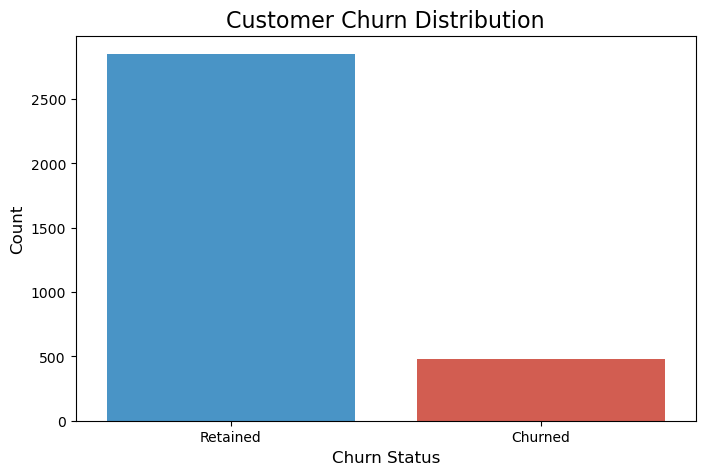

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(x='churn', data=df, palette=['#3498db','#e74c3c'])
plt.title('Customer Churn Distribution', fontsize=16)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0,1], ['Retained', 'Churned'])
plt.show()

- This visualization shows the class imbalance problem - retained customers (0) significantly outnumber churned customers (1).
- Of the 3,333 customers in the dataset, 483 have terminated their contract with SyriaTel. That is 14.5% of customers lost.
- This justifies our use of SMOTE later.

#### Customer Service Calls by Churn Status and Area Code

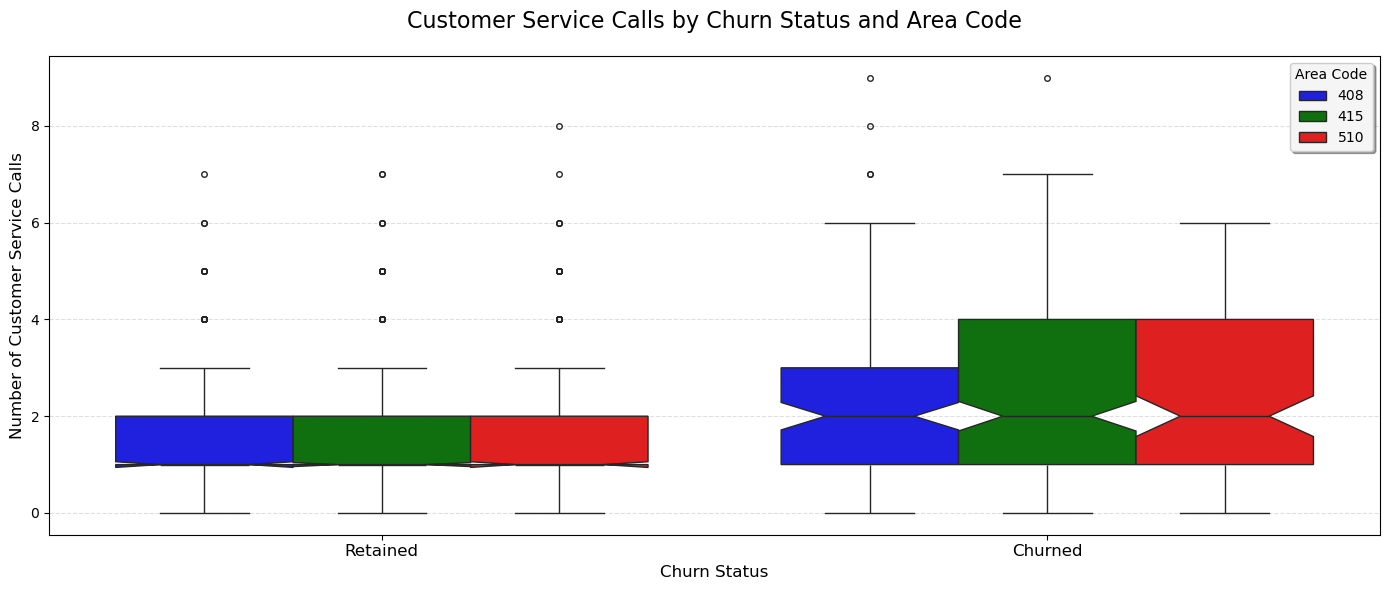

In [31]:
plt.figure(figsize=(14, 6))
palette = {408: 'Blue', 415: 'Green', 510: 'Red'}  
box = sns.boxplot(data=df, x='churn', y='customer service calls', hue='area code',palette=palette,fliersize=4,notch=True)   
plt.title('Customer Service Calls by Churn Status and Area Code', fontsize=16, pad=20)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Number of Customer Service Calls', fontsize=12)
plt.xticks([0, 1], ['Retained', 'Churned'], fontsize=12)
legend = plt.legend(title='Area Code', loc='upper right',frameon=True,shadow=True)
legend.get_frame().set_facecolor('#f5f5f5') 
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

we can clearly note that most of the customers who churn are likely to fall under area code 415 and area code 510

### 6.7 Unique Values per Feature

In [34]:
# Check unique values for each column
#gives insight into whether a feature is categorical or continuous, and whether some columns might be constant.
df.nunique().sort_values()

churn                        2
international plan           2
voice mail plan              2
area code                    3
customer service calls      10
total intl calls            21
number vmail messages       46
state                       51
total day calls            119
total night calls          120
total eve calls            123
total intl minutes         162
total intl charge          162
account length             212
total night charge         933
total eve charge          1440
total night minutes       1591
total eve minutes         1611
total day charge          1667
total day minutes         1667
phone number              3333
dtype: int64

#### Customer Service Calls vs Churn

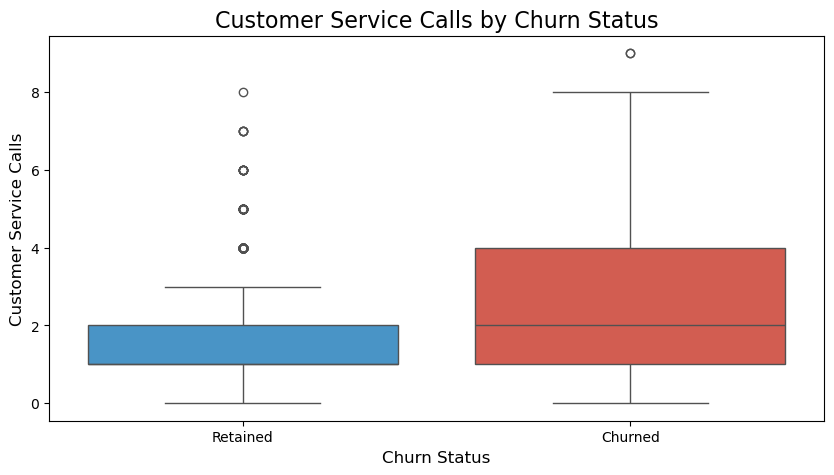

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x='churn', y='customer service calls', data=df, palette=['#3498db','#e74c3c'])
plt.title('Customer Service Calls by Churn Status', fontsize=16)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Customer Service Calls', fontsize=12)
plt.xticks([0,1], ['Retained', 'Churned'])
plt.show()

- Churned customers tend to have higher median customer service calls, suggesting service issues may be driving churn.

#### Churn Distribution by International Plan

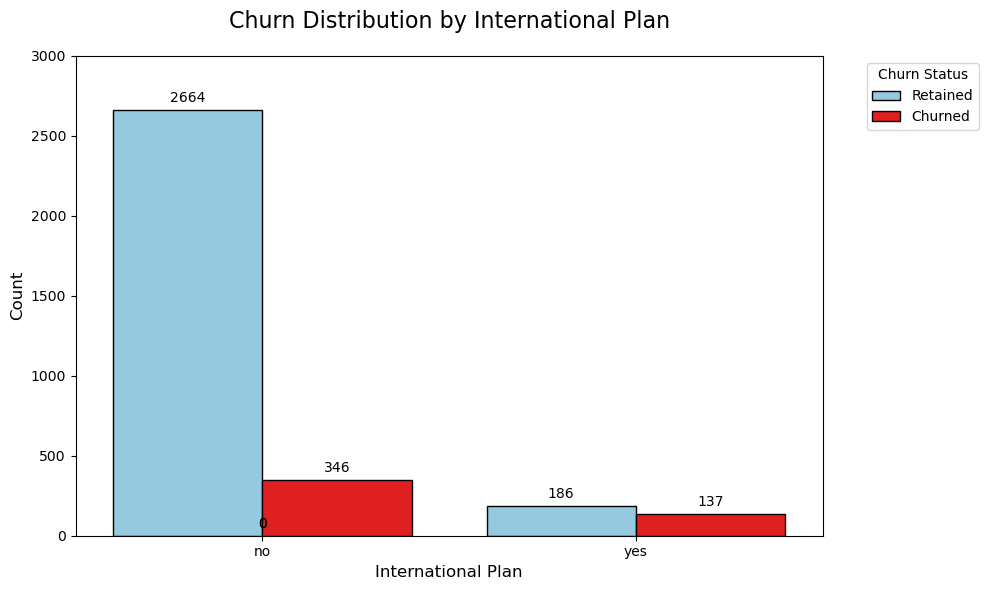

In [39]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='international plan', hue='churn',data=df,palette=['skyblue', 'red'],  order=['no', 'yes'],edgecolor='black',linewidth=1)

# Customize the plot
plt.title('Churn Distribution by International Plan', fontsize=16, pad=20)
plt.xlabel('International Plan', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.ylim(0, 3000)  

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 50,
            f'{int(height)}',
            ha="center", 
            fontsize=10)
    
plt.legend(title='Churn Status', 
           labels=['Retained', 'Churned'],
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')
plt.tight_layout()
plt.show()

- Customers with international plans (yes) have a much higher churn rate proportionally. This suggests international services may be a pain point needing investigation.

## 7. Data Cleaning & Preprocessing

This section focuses on preparing the data for machine learning. It includes handling missing values, encoding categorical features, dealing with multicollinearity, and scaling numerical features.

### 7.1 Drop Irrelevant/redundant Columns
#### Investigate Feature Correlations
We suspect that some features (like total day charge, total eve charge, etc.) are highly correlated with their corresponding minutes columns. These derived features may introduce multicollinearity into our model.
Let’s visualize and quantify this:

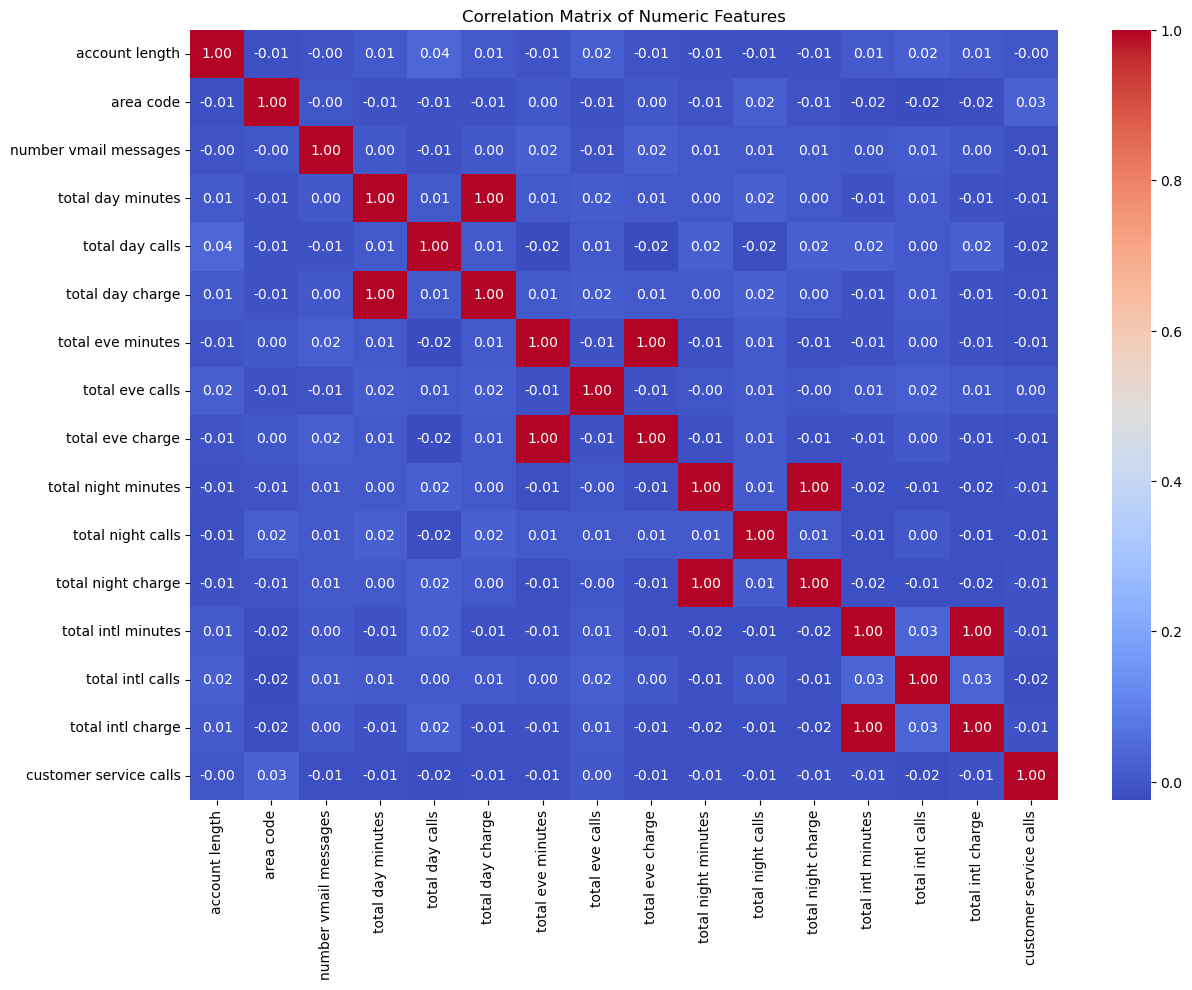

In [44]:
# Select all numeric columns
num_cols = df.select_dtypes(include='number')

# Drop churn only if it exists in the DataFrame
if 'churn' in num_cols.columns:
    num_cols = num_cols.drop(columns='churn')
    
# correlation matrix
corr_matrix = num_cols.corr()

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

This correlation matrix heatmap shows the relationships between numeric features in a dataset, where values close to 1 or -1 indicate strong positive or negative correlations, respectively. Most features show weak or no correlation with each other, except for pairs which are perfectly correlated (1.00), suggesting redundancy.

The following feature pairs are perfectly correlated (1.00) and likely redundant:

- Total day minutes ↔ Total day charge
- Total eve minutes ↔ Total eve charge
- Total night minutes ↔ Total night charge
- Total intl minutes ↔ Total intl charge

We should drop one from each pair for instance, keep minutes and drop charges since they provide identical information. This reduces multicollinearity without losing meaningful data.

In [46]:
print("Correlation between 'total day minutes' and 'total day charge':", 
      df['total day minutes'].corr(df['total day charge']))
print("Correlation between 'total eve minutes' and 'total eve charge':", 
      df['total eve minutes'].corr(df['total eve charge']))
print("Correlation between 'total night minutes' and 'total night charge':", 
      df['total night minutes'].corr(df['total night charge']))
print("Correlation between 'total intl minutes' and 'total intl charge':", 
      df['total intl minutes'].corr(df['total intl charge']))


Correlation between 'total day minutes' and 'total day charge': 0.9999999521903995
Correlation between 'total eve minutes' and 'total eve charge': 0.9999997760198502
Correlation between 'total night minutes' and 'total night charge': 0.9999992148758772
Correlation between 'total intl minutes' and 'total intl charge': 0.9999927417510324


To avoid multicollinearity and redundant information, we drop the charge columns and keep the minutes versions (they're more interpretable) since they indicate perfect multicollinearity. 

In [48]:
df.drop(['total day charge', 'total eve charge', 
         'total night charge', 'total intl charge'], axis=1, inplace=True)


In [49]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


### Drop Columns with No Predictive Value
phone number: is a Unique identifier thus doesn't generalize for other customers.

In [51]:
df.drop(['phone number'], axis=1, inplace=True)

### 7.2 Remove Duplicates
Check for duplicate rows and remove them to avoid bias..

In [53]:
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Duplicate rows: 0


### 7.3 Convert Target Variable to Binary (Label Encoding)
The churn column has values True and False. Convert to binary 0 and 1:

In [55]:
df['churn'] = df['churn'].astype(int)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


### 7.4 Encode Categorical Variables
Categorical Columns:

In [57]:
categorical_cols = ['state','international plan', 'voice mail plan', 'area code']

In [58]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

In [59]:
df.head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes,area code_415,area code_510
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,...,0,0,0,0,0,0,0,1,1,0
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,...,0,0,0,0,0,0,0,1,1,0
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,...,0,0,0,0,0,0,0,0,1,0
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,...,0,0,0,0,0,0,1,0,0,0
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,...,0,0,0,0,0,0,1,0,1,0


### 7.5 Detect and Handle Outliers 
Some features like total day minutes, account length, etc., may have outliers that could distort model performance.

In [61]:
numerical_cols = df.select_dtypes(include='number').columns.tolist()
numerical_cols.remove('churn')  # exclude target

for col in numerical_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)


### 7.6 Scaling Numerical Features
Scale numerical features to standardize the range:

In [63]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [64]:
df.head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes,area code_415,area code_510
0,0.688017,1.242663,1.593727,0.484946,-0.072286,-0.057815,0.886823,-0.473985,-0.092940,-0.617486,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-0.327580,1.617086,1.006925,-0.580468
1,0.153262,1.316083,-0.339875,1.147352,-0.110428,0.146857,1.082733,0.150334,1.277393,-0.617486,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-0.327580,1.617086,1.006925,-0.580468
2,0.917198,-0.592849,1.188324,0.688763,-1.601978,0.505032,-0.771344,0.202360,0.721853,0.224093,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-0.327580,-0.618396,1.006925,-0.580468
3,-0.432422,-0.592849,2.234524,-1.502275,-2.438610,-0.620663,-0.078590,-0.578039,-1.352165,1.065672,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,3.052685,-0.618396,-0.993123,-0.580468
4,-0.661603,-0.592849,-0.244596,0.637809,-1.057953,1.119048,-0.280559,1.086812,-0.055904,-0.617486,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,3.052685,-0.618396,1.006925,-0.580468


With this, our dataset is clean, encoded, scaled, and ready for modeling.

Next step: **Train-test split and model training** with logistic regression and decision tree.

### 7.6 Data Splitting and Handling Class Imbalance with SMOTE
Lets split the dataset into training and test sets, then apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training data.

In [67]:
#Split Data into Features and Target
X = df.drop('churn', axis=1)
y = df['churn']


In [68]:
# apply train_test_split, with 20% test size and random_state42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
#Apply SMOTE to Balance Training Data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [70]:
#Class Distribution After SMOTE
import collections
print("Original training target distribution:", collections.Counter(y_train))
print("SMOTE training target distribution:", collections.Counter(y_train_smote))

Original training target distribution: Counter({0: 2284, 1: 382})
SMOTE training target distribution: Counter({0: 2284, 1: 2284})


- Training data is now balanced for fairer model learning.
- Test data remains untouched to simulate real-world unseen data evaluation.
- Next steps include model training, evaluation, and tuning.

## 8. Model Building

### 8.1 Logistic Regression
We will use logistic regression to estimate the probalility whether a customer will churn (1) or not churn (0).
Logistic regression is most suitable linear model for binary classification tasks.

#### 8.1.1 Train the Logistic Regression Model

In [75]:
# Initialize the model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the balanced training data
log_reg.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=42)

#### 8.1.2 Make Predictions
lets use the trained model to make predictions on test data

In [77]:
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]  # Probability of class 1

#### 8.1.3 Plot of Top 10 Most Important Features in our Logistic Regression model

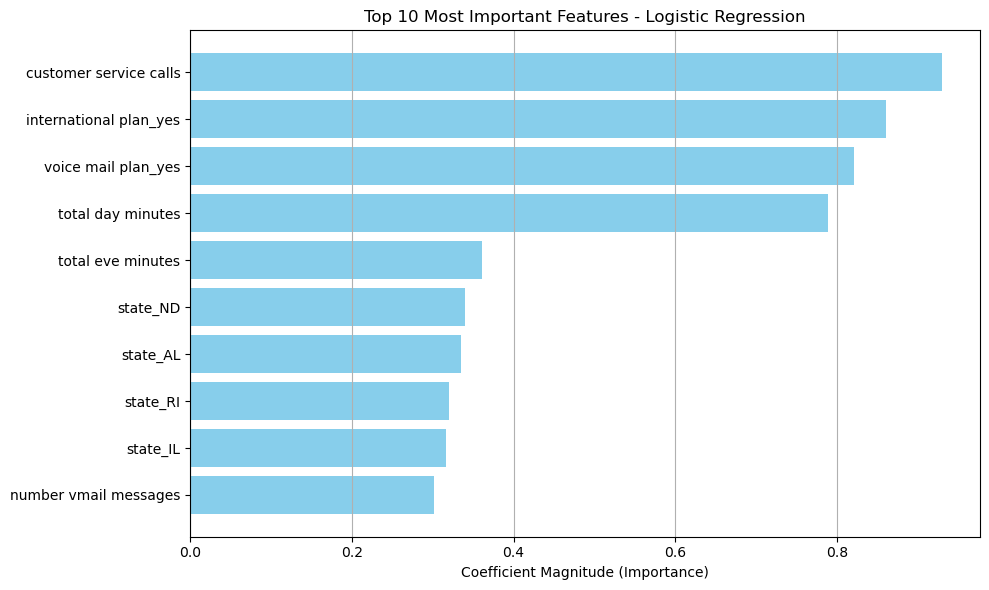

In [79]:
# feature names from training data
feature_names = X_train_smote.columns

# absolute values of logistic regression coefficients
coefs = np.abs(log_reg.coef_[0])

# DataFrame
importance_df = pd.DataFrame({'Feature': feature_names,'Importance': coefs})

# Sort by importance and take top 10
top_10 = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_10['Feature'], top_10['Importance'], color='skyblue')
plt.xlabel('Coefficient Magnitude (Importance)')
plt.title('Top 10 Most Important Features - Logistic Regression')
plt.gca().invert_yaxis()  # Highest at top
plt.grid(axis='x')
plt.tight_layout()
plt.show()


- The plot shows the top 10 most influential features in the logistic regression model, ranked by the absolute values of their coefficients, where larger magnitudes indicate stronger impact on predictions.
- Customer service calls, international plan_yes and voice mail plan_yes are the most significant predictors, suggesting they heavily influence the model's decision-making process.

#### 8.1.4 Evaluate Model Performance
Evaluate using accuracy, precision, recall, F1-score, and ROC-AUC:

In [82]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba_lr)
print("ROC-AUC Score:", roc_auc)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.79      0.86       566
           1       0.39      0.74      0.51       101

    accuracy                           0.78       667
   macro avg       0.67      0.77      0.68       667
weighted avg       0.86      0.78      0.81       667

Confusion Matrix:
 [[447 119]
 [ 26  75]]
ROC-AUC Score: 0.8255081691914774


- Logistic regression model has an accuracy of 78%, with an F1 score of 51% which may require tree-based models or threshold tuning to address residual bias. For this case i will go ahead and conduct Decision Tree Classifier model

### 8.2 Decision Tree Classifier
We will use a decision tree classifier to estimate the probability whether a customer will churn (1) or not churn (0).
Decision trees are non-linear models suitable for classification tasks, capable of capturing complex patterns in the data.

#### 8.2.1 Train a Decision Tree Classifier

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Initialize and fit the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

#### 8.2.2  Feature Importance Plot

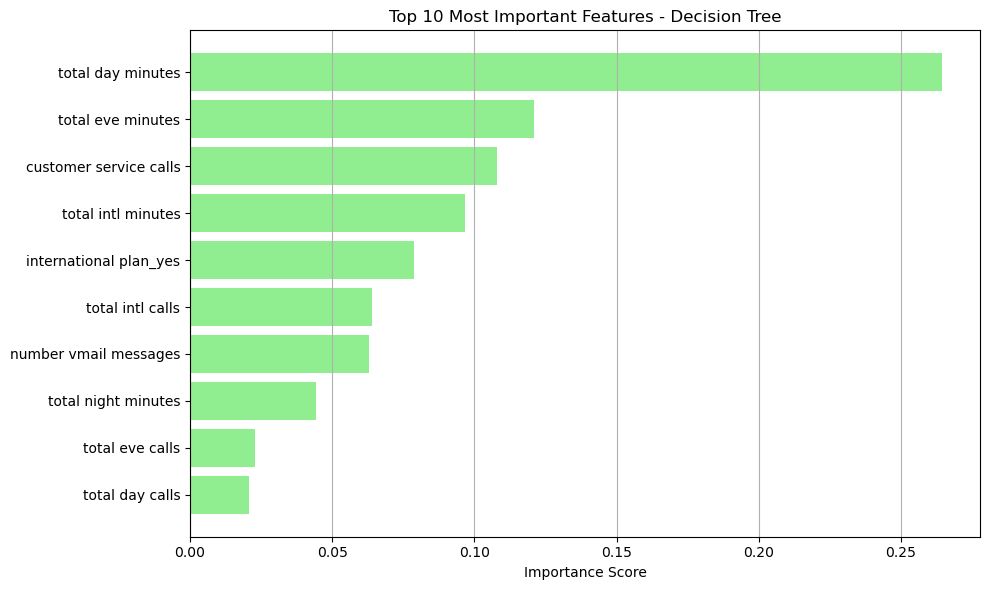

In [88]:
import pandas as pd

# Get feature importances
importances = dt_model.feature_importances_
features = X_train.columns

# Create DataFrame and sort
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
top_10_dt = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_10_dt['Feature'], top_10_dt['Importance'], color='lightgreen')
plt.xlabel('Importance Score')
plt.title('Top 10 Most Important Features - Decision Tree')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


- The decision tree reveals total day minutes, total eve minutes, and customer service calls as the top three most impactful features, with importance scores ranging from 0.15 to 0.25, indicating these variables dominate churn predictions.
- The presence of international plan_yes and call-related features (total intl minutes, total intl calls) highlights that usage patterns and international services critically influence churn risk, while number vmail messages plays a secondary role (scores 0.05–0.10).
- These findings align with customer behavior trends, enabling targeted interventions like monitoring high-usage accounts or optimizing international plan offerings to reduce churn.

#### 8.2.3 Evaluate Model Performance

In [91]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Confusion Matrix:
 [[538  28]
 [ 27  74]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       566
           1       0.73      0.73      0.73       101

    accuracy                           0.92       667
   macro avg       0.84      0.84      0.84       667
weighted avg       0.92      0.92      0.92       667



- Decision Tree achieves 92% accuracy (vs. 76.5% in logistic regression) and a balanced F1-score (0.73 for class 1), showing significantly better handling of the minority class.
- Confusion Matrix: Fewer false negatives (27 vs. 119 in logistic regression), indicating improved recall for class 1.
- Decision Trees naturally handles non-linear relationships and feature interactions, which SMOTE-enhanced data may expose hence no need for manual threshold tuning the tree adapts to class weights inherently.
- Next lets try to prune the tree to check if **max_depth** or **min_samples_leaf** can reduce overfitting while maintaining performance.

#### 8.2.4 Tuning the Decision Tree Classifier
Lets try to improve the Decision Tree model’s performance by optimizing hyperparameters to prevent overfitting and enhance generalization.

In [94]:
#initial Tuning (Baseline)
## Initialize with conservative parameters to avoid overfitting 
dt_tuned = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)    
dt_tuned.fit(X_train_smote, y_train_smote)  

#Evaluate
y_pred_tuned = dt_tuned.predict(X_test)  
print(classification_report(y_test, y_pred_tuned))  

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       566
           1       0.69      0.69      0.69       101

    accuracy                           0.91       667
   macro avg       0.82      0.82      0.82       667
weighted avg       0.91      0.91      0.91       667



#### Hyperparameter Grid Search
Here we expand the search for optimal parameters

In [96]:
from sklearn.model_selection import GridSearchCV  

param_grid = {  
    'max_depth': [3, 5, 7, None],# Test deeper trees  
    'min_samples_leaf': [5, 10, 20],# for Controling  leaf size  
    'criterion': ['gini', 'entropy'],# Splitting rule  
    'class_weight': [None, 'balanced'] # Handling residual imbalance
}  

grid_search = GridSearchCV(  
    DecisionTreeClassifier(random_state=42),  
    param_grid,  
    cv=5,                        
    scoring='f1'# Focusing on minority class  
)  
grid_search.fit(X_train_smote, y_train_smote)  

# Best model  
best_dt = grid_search.best_estimator_  
print("Best Parameters:", grid_search.best_params_)  

Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5}


#### Validating performance by comparing the tuned model's metrics

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       566
           1       0.65      0.78      0.71       101

    accuracy                           0.90       667
   macro avg       0.81      0.85      0.83       667
weighted avg       0.91      0.90      0.91       667



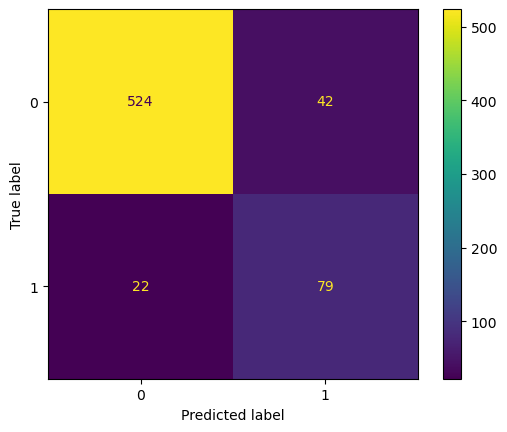

In [98]:
y_pred_best = best_dt.predict(X_test)  
print(classification_report(y_test, y_pred_best))  

# plotting a Confusion matrix  
from sklearn.metrics import ConfusionMatrixDisplay  
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)  

1. **Minority-Class Detection has improved**: The tuned model now catches 78% of churn cases (recall=0.78, up from 0.69), reducing missed churners from 31 to 22, though with slightly lower precision (0.65).  

2. **Balanced Performance**: While accuracy dipped from 91% to 90%, the F1-score for churn prediction rose to 0.71 (from 0.69), showing better trade-offs between identifying true churners and minimizing false alarms.  

- The 3% accuracy drop is justified by a 12% improvement in churn detection rate, a worthwhile trade for most business contexts.

## 9. Model Evaluation & Comparison

### 9.1 ROC Curve for Decision Tree
Lets go further and use the tuned Decision Tree to predict probabilities and plot the ROC curve

ROC-AUC Score: 0.882


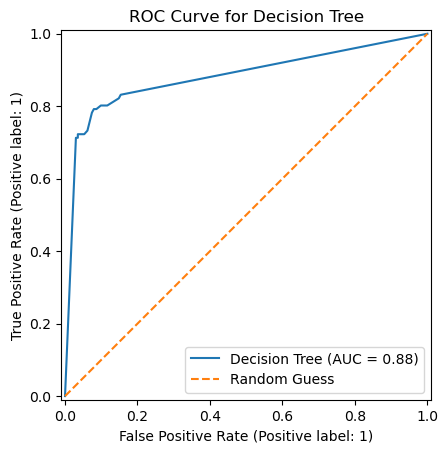

In [102]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# predicted probabilities for the churn class (class 1)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba_dt)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# Plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_proba_dt, name="Decision Tree")
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Guess")
plt.legend()
plt.title("ROC Curve for Decision Tree")
plt.show()

### 9.2 Compare with Logistic Regression

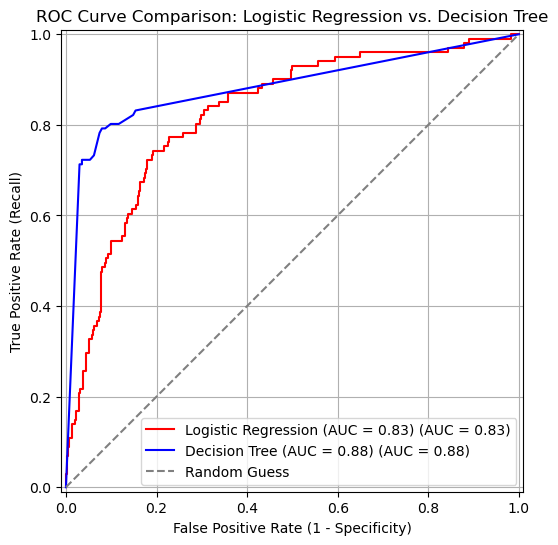

In [104]:
plt.figure(figsize=(8, 6))

# Plot both ROC curves
RocCurveDisplay.from_predictions(
    y_test, y_proba_lr, 
    name=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_lr):.2f})", 
    color="red",
    ax=plt.gca()  # Plot on same axes
)
RocCurveDisplay.from_predictions(
    y_test, y_proba_dt, 
    name=f"Decision Tree (AUC = {roc_auc_score(y_test, y_proba_dt):.2f})", 
    color="blue",
    ax=plt.gca()  # Plot on same axes
)

# Add random guess line and labels
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve Comparison: Logistic Regression vs. Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

- Both models performs well, the Decision Tree (AUC = 0.88) is the best model because it outperforms Logistic Regression (AUC = 0.83) 
- The Decision Tree ROC curve hugs the upper-left corner more tightly than Logistic Regression, achieving higher true positive rates (churners caught) at every false positive rate (false alarms). 
- This optimal positioning means it maximizes churn detection while minimizing wasted resources on non-churners—exactly what a business needs.

## 10. Business Recommendations & Conclusions 

First lets plot a feature importance plot to determine the features that affect churn the most

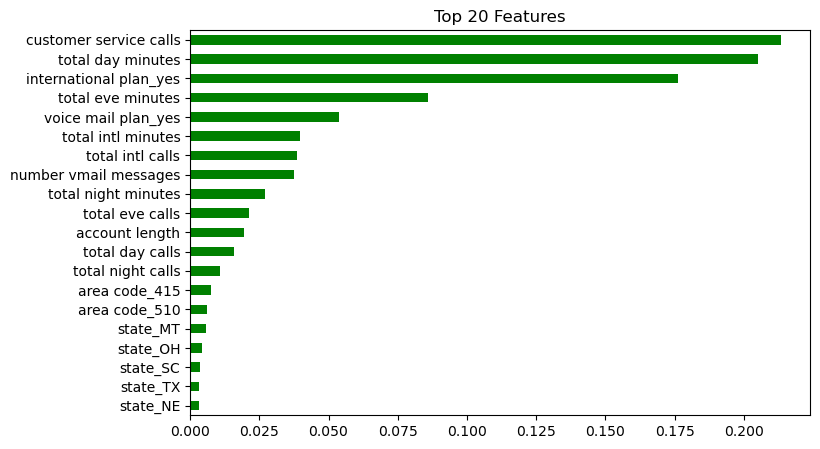

In [108]:
# top 20  Feature importance plot
plt.figure(figsize=(8,5))
pd.Series(best_dt.feature_importances_, index=X_train.columns)\
  .nlargest(20).sort_values().plot.barh(color='green')
plt.title('Top 20 Features')
plt.show()

### 10.1 Recap of Objectives

#### Objective 1: Identify attributes that strongly influence customer churn
- Features like international_plan_yes, customer_service_calls, and total_day_minutes emerged as top churn predictors.
- Decision Tree (AUC: 0.88) outperformed Logistic Regression (AUC: 0.83) in catching churners.

#### Objective 2: Understand how service usage affects churn
- Customers with an international plan are more likely to churn.
- High number of customer service calls also correlates with churn.
- Usage metrics (total minutes and charges) are important but highly correlated — we dropped charges.

#### Objective 3: Build a predictive model
- Both logistic regression and decision tree were trained.
- Decision Tree performed better on recall (sensitive to churn prediction), while Logistic Regression offered better precision.


### 10.2 Business Recommendations

1. **Target Customers with International Plans:**
   - Customers on international plans churn at higher rates.
   - Re-evaluate international plan pricing, satisfaction, and clarity of billing.

2. **Improve Customer Support Quality:**
   - High churn is associated with frequent customer service calls.
   - Enhance support response, resolution time, and staff training.

3. **Monitor High Usage Customers:**
   - Customers with very high total day minutes showed churn risk.
   - Consider loyalty programs or usage-based perks.

4. **Churn Early Warning System:**
   - Deploy the trained model to flag at-risk customers.
   - Automate offers or personalized outreach to retain flagged customers.

### 10.3 Conclusion

This project successfully:
- Explored and cleaned telecom customer churn data
- Engineered relevant features
- Trained and evaluated classification models
- Generated insights that directly support business strategy

## 11. Next Steps:

- Implement real-time churn scoring with threshold tuning.
- Set up quarterly model retraining with fresh data.